In [171]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv(r'E:\Users\James\DataSets\movies.csv')

In [172]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [173]:
#Check for missing data

for i in df.columns:
    missing = np.mean(df[i].isnull())
    print('{} - {}%'.format(i, missing))
    

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [174]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [175]:
#Cleaning Data, filling in null columns
df['budget'] = df['budget'].fillna(0.0)

In [176]:
df['rating'] = df['rating'].fillna('NA')
#Can also be marked as 'Not Rated'

In [177]:
pd.set_option('display.max_rows', 20)
df['released'] = df['released'].fillna('NA')
df['score'] = df['score'].fillna(0.0)
df['votes'] = df['votes'].fillna(0.0)
df['writer'] = df['writer'].fillna('NA')
df['star'] = df['star'].fillna('NA')
df['country'] = df['country'].fillna('NA')
df['gross'] = df['gross'].fillna(0.0)
df['company'] = df['company'].fillna('NA')
df['runtime'] = df['runtime'].fillna(0.0)

In [178]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [179]:
#changing data types of votes, budget, runtime and gross from float64 to int64, as they all have 0 after the decimal
df['votes'] = df['votes'].astype('int64')
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [180]:
#Using a regular expression to create a new year column 'realyear' based on the 'released' column in order to avoid 
#potential differences between data in the 'year' and 'released' columns

df['realyear'] = df['released'].astype(str).str.extract(r'(\d{4})')
    

In [181]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,realyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [182]:
#Check for missing data

for i in df.columns:
    missing = np.mean(df[i].isnull())
    print('{} - {}%'.format(i, missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%
realyear - 0.0002608242044861763%


In [183]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
realyear     object
dtype: object

In [184]:
#Changing the 'newyear' column from an object to int64
df['realyear'] = pd.to_numeric(df['realyear'], errors='coerce', downcast='integer')

In [185]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
realyear    float64
dtype: object

In [186]:
df['realyear'] = df['realyear'].fillna(0).astype('int64')

In [187]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime       int64
realyear      int64
dtype: object

In [188]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,realyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [189]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,realyear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89,1989
1601,My Twentieth Century,NA,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104,1990


In [190]:
pd.set_option('display.max_rows', 100)

In [191]:
#Drop any duplicates 

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
5813                        10 West Studios
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 2386, dtype: object

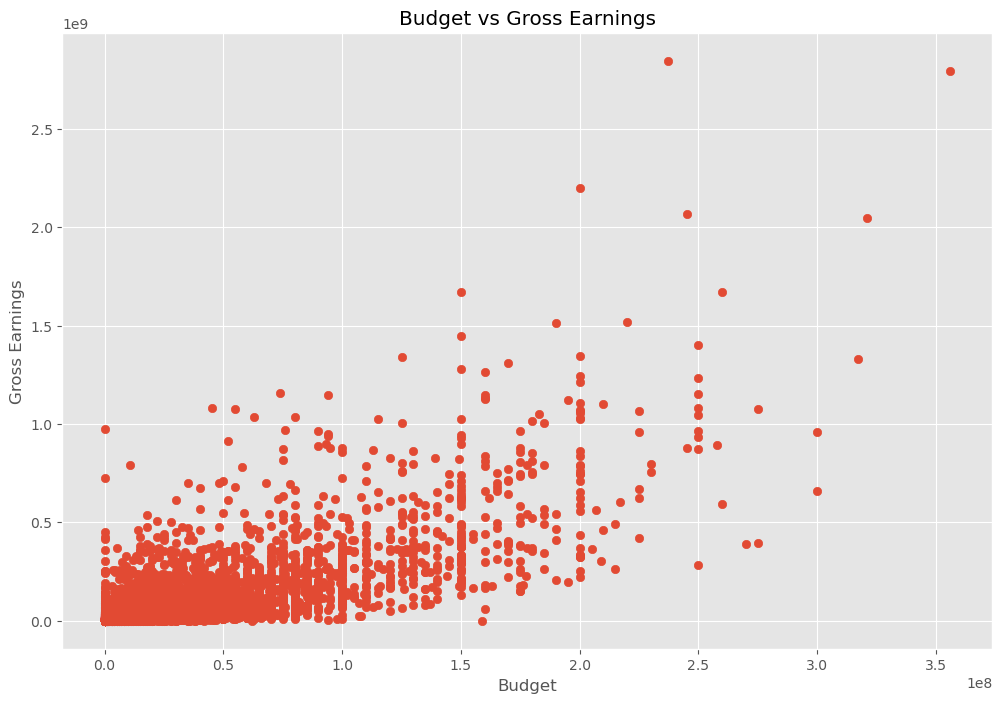

In [192]:
#Scatter plot with budget x-axis and gross y-axis, comparing the two

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget')
plt.ylabel("Gross Earnings")

plt.show()

<Axes: >

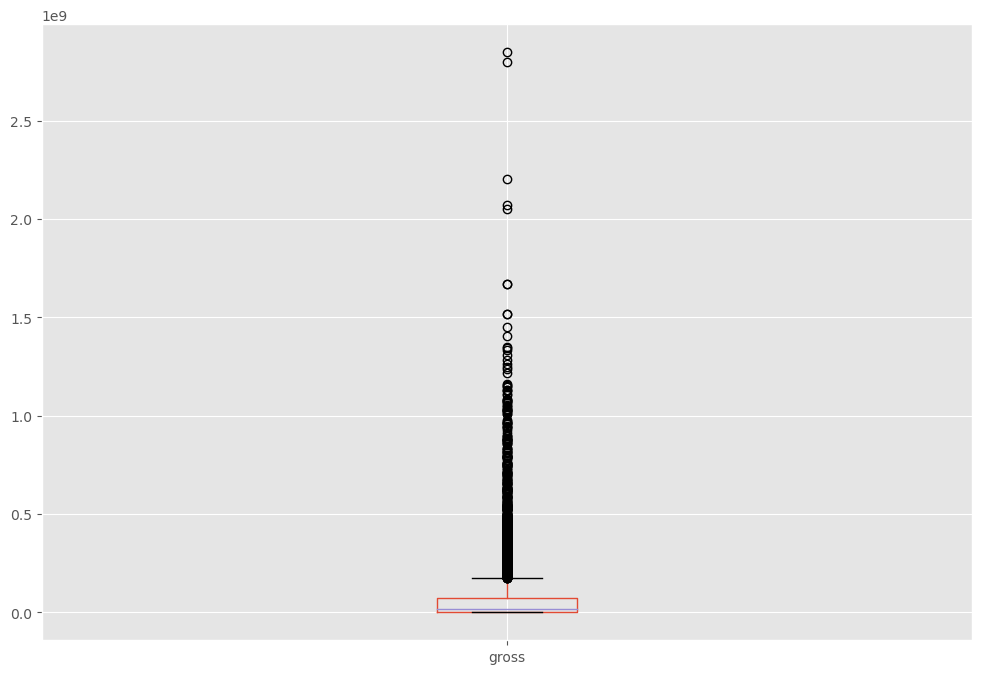

In [193]:
#Checking for outliers in gross income
df.boxplot(column=['gross'])

<Axes: xlabel='budget', ylabel='gross'>

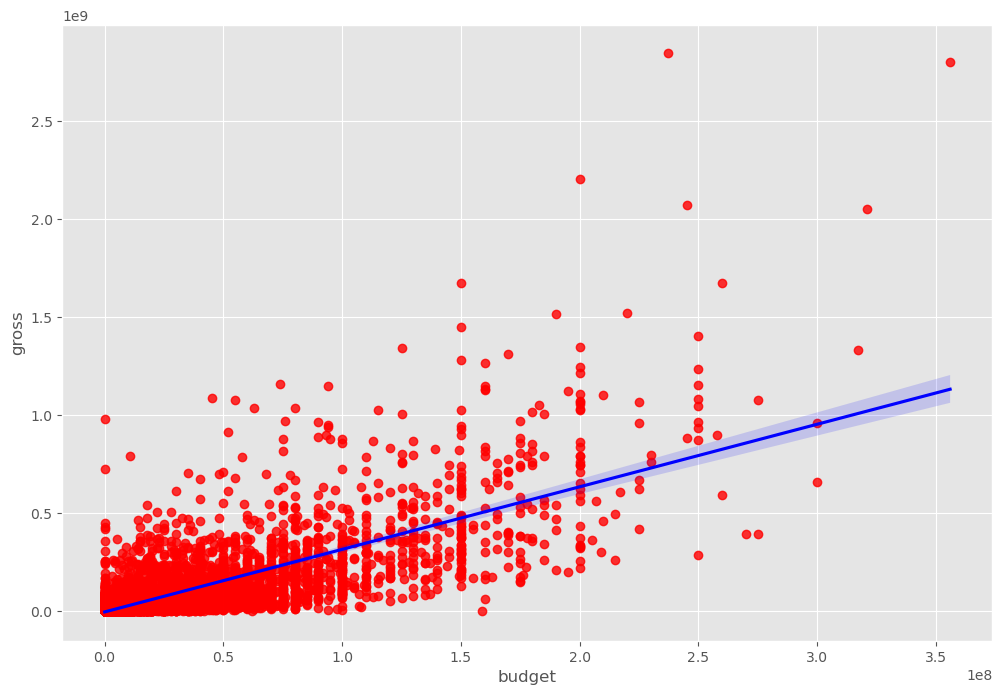

In [194]:
#Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

In [152]:
#Correlation between all numeric columns, using pearson, kendall and spearman
df.corr(method = 'pearson', numeric_only=True)

,year,score,votes,budget,gross,runtime,realyear
year,1.000000,0.092616,0.222427,0.309212,0.261900,0.116358,0.312521
score,0.092616,1.000000,0.407101,0.056863,0.186012,0.394564,0.043598
votes,0.222427,0.407101,1.000000,0.486931,0.632870,0.306984,0.070183
budget,0.309212,0.056863,0.486931,1.000000,0.750157,0.268372,0.108069
gross,0.261900,0.186012,0.632870,0.750157,1.000000,0.244339,0.090394
runtime,0.116358,0.394564,0.306984,0.268372,0.244339,1.000000,0.125727
realyear,0.312521,0.043598,0.070183,0.108069,0.090394,0.125727,1.000000


In [153]:
df.corr(method = 'kendall', numeric_only=True)

,year,score,votes,budget,gross,runtime,realyear
year,1.000000,0.066796,0.330410,0.209304,0.216595,0.096390,0.986854
score,0.066796,1.000000,0.300673,-0.004843,0.091331,0.283601,0.072838
votes,0.330410,0.300673,1.000000,0.439883,0.560449,0.197697,0.324315
budget,0.209304,-0.004843,0.439883,1.000000,0.541956,0.176184,0.200629
gross,0.216595,0.091331,0.560449,0.541956,1.000000,0.177429,0.206940
runtime,0.096390,0.283601,0.197697,0.176184,0.177429,1.000000,0.097006
realyear,0.986854,0.072838,0.324315,0.200629,0.206940,0.097006,1.000000


In [154]:
df.corr(method = 'spearman', numeric_only=True)

,year,score,votes,budget,gross,runtime,realyear
year,1.000000,0.097757,0.468107,0.291152,0.314681,0.141805,0.996530
score,0.097757,1.000000,0.428810,-0.007002,0.133564,0.399868,0.106698
votes,0.468107,0.428810,1.000000,0.604693,0.752550,0.289359,0.460387
budget,0.291152,-0.007002,0.604693,1.000000,0.716816,0.246941,0.279081
gross,0.314681,0.133564,0.752550,0.716816,1.000000,0.257478,0.300953
runtime,0.141805,0.399868,0.289359,0.246941,0.257478,1.000000,0.142874
realyear,0.996530,0.106698,0.460387,0.279081,0.300953,0.142874,1.000000


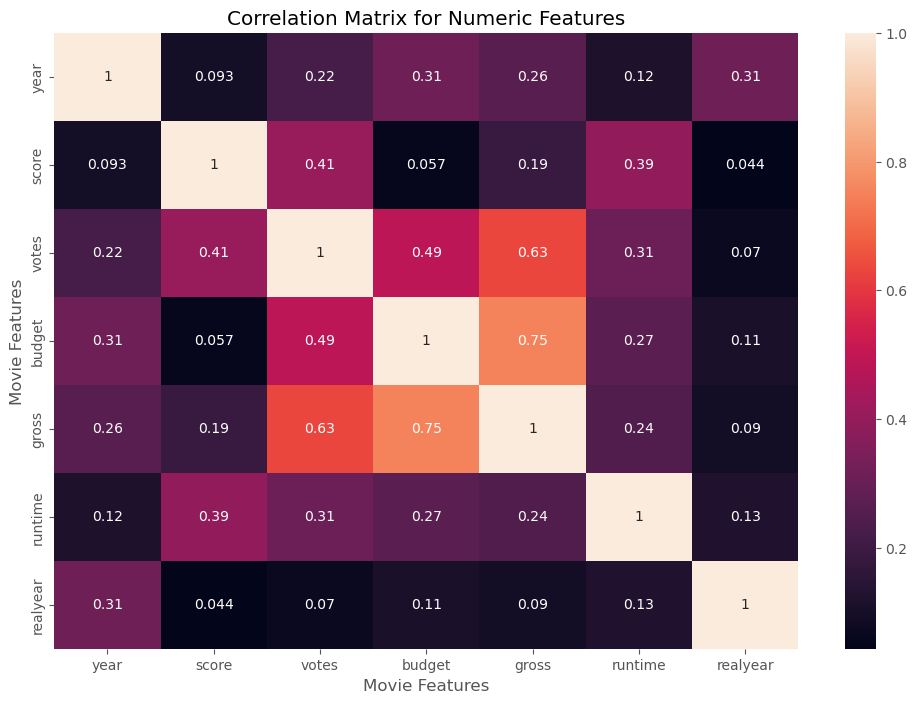

In [155]:
#Visualization of Correlation Matrix (Dark colors = Low Correlation, Bright colors = High Correlation)

correlation_matrix = df.corr(method='pearson', numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [156]:
#Numerizing object dtypes to add to correlation matrix

#df_numerized = df

#for col_name in df_numerized.columns:
#    if(df_numerized[col_name].dtype == 'object'):
#        df_numerized[col_name] = df_numerized[col_name].astype('category')
#        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
#df_numerized.sort_values(by=['gross'], inplace=False, ascending=False)

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
    

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,realyear
name,1.000000,0.154269,0.036367,0.965761,0.959855,-0.042806,0.290143,0.745905,0.805801,0.731509,0.144960,0.275691,0.947540,0.591834,0.052214,0.820885
rating,0.154269,1.000000,-0.091898,0.166475,0.156544,0.011934,0.103921,0.098462,0.115812,0.107458,0.020296,0.186280,0.161545,-0.011014,0.037071,0.142017
genre,0.036367,-0.091898,1.000000,0.037184,0.035980,-0.004334,0.021797,0.047288,0.033933,0.038918,-0.015182,0.069445,0.038635,0.009203,0.000442,0.028752
year,0.965761,0.166475,0.037184,1.000000,0.994020,-0.041029,0.314745,0.770497,0.825351,0.756341,0.142259,0.298022,0.981090,0.601720,0.053816,0.849643
released,0.959855,0.156544,0.035980,0.994020,1.000000,-0.041646,0.302558,0.771360,0.820646,0.755408,0.150028,0.283644,0.975823,0.607607,0.050459,0.841007
score,-0.042806,0.011934,-0.004334,-0.041029,-0.041646,1.000000,-0.005335,-0.020344,-0.030743,-0.005082,0.022484,-0.009946,-0.050456,-0.027604,0.029090,-0.034960
votes,0.290143,0.103921,0.021797,0.314745,0.302558,-0.005335,1.000000,0.193607,0.226874,0.182897,-0.046373,0.395999,0.283068,0.009550,0.109088,0.278643
director,0.745905,0.098462,0.047288,0.770497,0.771360,-0.020344,0.193607,1.000000,0.748875,0.682358,0.157134,0.108033,0.751149,0.552420,-0.007714,0.642925
writer,0.805801,0.115812,0.033933,0.825351,0.820646,-0.030743,0.226874,0.748875,1.000000,0.676284,0.158919,0.186522,0.806367,0.547126,0.035239,0.707518
star,0.731509,0.107458,0.038918,0.756341,0.755408,-0.005082,0.182897,0.682358,0.676284,1.000000,0.184619,0.110894,0.735844,0.527363,0.039668,0.640472


In [157]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,realyear
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89,1989
1601,My Twentieth Century,NA,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104,1990


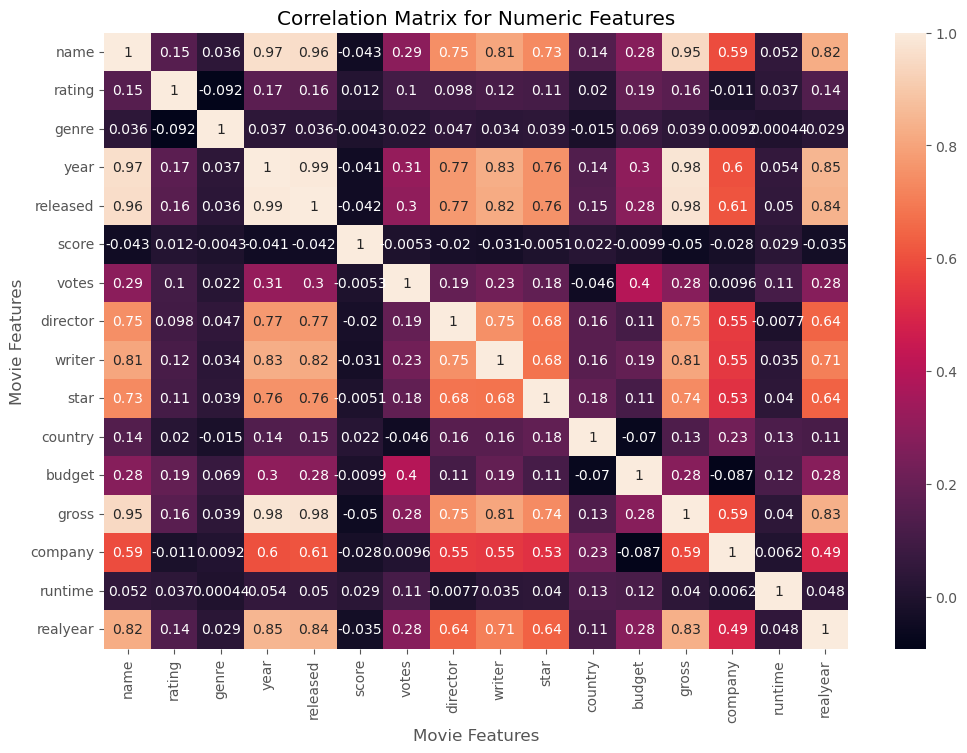

In [158]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [159]:
corr_mat = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')
corr_pairs = corr_mat.unstack()
corr_pairs

name      name        1.000000
          rating      0.154269
          genre       0.036367
          year        0.965761
          released    0.959855
                        ...   
realyear  budget      0.279686
          gross       0.830429
          company     0.494665
          runtime     0.047987
          realyear    1.000000
Length: 256, dtype: float64

In [160]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

genre     rating     -0.091898
rating    genre      -0.091898
company   budget     -0.087490
budget    company    -0.087490
country   budget     -0.069766
                        ...   
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
runtime   runtime     1.000000
realyear  realyear    1.000000
Length: 256, dtype: float64

In [161]:
#Looking for ones that have high correlation

high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

star      company     0.527363
company   star        0.527363
          writer      0.547126
writer    company     0.547126
director  company     0.552420
company   director    0.552420
          gross       0.587945
gross     company     0.587945
company   name        0.591834
name      company     0.591834
year      company     0.601720
company   year        0.601720
          released    0.607607
released  company     0.607607
star      realyear    0.640472
realyear  star        0.640472
director  realyear    0.642925
realyear  director    0.642925
star      writer      0.676284
writer    star        0.676284
star      director    0.682358
director  star        0.682358
realyear  writer      0.707518
writer    realyear    0.707518
star      name        0.731509
name      star        0.731509
gross     star        0.735844
star      gross       0.735844
name      director    0.745905
director  name        0.745905
writer    director    0.748875
director  writer      0.748875
gross   

In [162]:
#Votes and Budget have the highest correlation to gross earnings

#Company has low correlation

#High Correlation between the Director, Writer and, Star. Think of the Quentin Tarantinos of the world
#Who always rehire actors from previous films for new roles 

In [163]:
#Top 15 Companies by Gross Revenue

CompanyGrossSum = df.groupby('company')[['gross']].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64')
CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [164]:
df.groupby(['company', 'year'])[['gross']].sum()

,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,44350926
"""Weathering With You"" Film Partners",2019,193457467
.406 Production,1996,10580
1+2 Seisaku Iinkai,2000,1196218
10 West Studios,2010,814906
...,...,...
i am OTHER,2015,17986781
i5 Films,2001,10031529
iDeal Partners Film Fund,2013,506303


In [165]:
#Top Companies by Gross Revenue and Year

CompanyGrossSum = df.groupby(['company', 'year'])[['gross']].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross', 'company', 'year'], ascending = False)[:15]
CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64')
CompanyGrossSumSorted

#Seeing if there is correlation between recency of film and gross revenue

company                year
Walt Disney Pictures   2019    5773131804
Marvel Studios         2018    4018631866
Universal Pictures     2015    3834354888
Twentieth Century Fox  2009    3793491246
Walt Disney Pictures   2017    3789382071
Paramount Pictures     2011    3565705182
Warner Bros.           2010    3300479986
                       2011    3223799224
Walt Disney Pictures   2010    3104474158
Paramount Pictures     2014    3071298586
Columbia Pictures      2006    2934631933
                       2019    2932757449
Marvel Studios         2019    2797501328
Warner Bros.           2018    2774168962
Columbia Pictures      2011    2738363306
Name: gross, dtype: int64

In [166]:
#Alternate method of numerizing object columns

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,realyear
5445,533,6,0,2009,696,7.8,1100000,1155,1778,2335,56,237000000,2847246203,2254,162,2009
7445,535,6,0,2019,183,8.4,903000,162,743,2242,56,356000000,2797501328,1606,181,2019
3045,6896,6,6,1997,704,7.8,1100000,1155,1778,1595,56,200000000,2201647264,2254,194,1997
6663,5144,6,0,2015,698,7.8,876000,1125,2550,524,56,245000000,2069521700,1540,138,2015
7244,536,6,0,2018,192,8.4,897000,162,743,2242,56,321000000,2048359754,1606,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,3712,7,5,1989,1277,4.5,274,117,82,2798,56,0,0,1159,92,1990
1614,1745,7,10,1989,55,5.2,1300,1033,1743,166,55,0,0,146,85,1989
1606,2691,7,8,1989,257,6.0,2900,2743,946,1195,6,0,0,2238,89,1989
1601,3836,2,4,1989,1160,7.1,1500,1105,1696,681,18,0,0,504,104,1990


In [167]:
df_numerized.corr(method='pearson')

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,realyear
name,1.000000,-0.010640,0.016355,0.011453,-0.010703,0.016377,0.013038,0.009079,0.009733,0.006742,-0.010397,0.020548,0.006989,0.010087,0.008483,-0.010642
rating,-0.010640,1.000000,0.090041,0.018928,0.017688,0.004441,0.026496,0.020088,-0.005207,0.009375,0.066148,-0.097327,-0.107710,-0.053517,0.075784,-0.004497
genre,0.016355,0.090041,1.000000,-0.081261,0.030296,0.027384,-0.145296,-0.015258,0.006701,-0.004873,-0.036475,-0.334021,-0.234297,-0.070445,-0.052914,-0.035768
year,0.011453,0.018928,-0.081261,1.000000,-0.000128,0.092616,0.222427,-0.020795,-0.008141,-0.027729,-0.069946,0.309212,0.261900,-0.011193,0.116358,0.312521
released,-0.010703,0.017688,0.030296,-0.000128,1.000000,0.039362,0.015911,-0.001517,-0.003342,0.015566,-0.022202,0.008688,0.000186,-0.008973,0.001072,-0.014034
score,0.016377,0.004441,0.027384,0.092616,0.039362,1.000000,0.407101,0.010568,0.022378,0.000587,-0.134223,0.056863,0.186012,-0.003112,0.394564,0.043598
votes,0.013038,0.026496,-0.145296,0.222427,0.015911,0.407101,1.000000,0.000349,0.000672,-0.019316,0.073732,0.486931,0.632870,0.131575,0.306984,0.070183
director,0.009079,0.020088,-0.015258,-0.020795,-0.001517,0.010568,0.000349,1.000000,0.299519,0.039700,0.017736,0.004976,-0.014916,0.004295,0.017062,-0.005853
writer,0.009733,-0.005207,0.006701,-0.008141,-0.003342,0.022378,0.000672,0.299519,1.000000,0.028432,0.014760,-0.026544,-0.022986,0.002814,-0.004160,0.003839
star,0.006742,0.009375,-0.004873,-0.027729,0.015566,0.000587,-0.019316,0.039700,0.028432,1.000000,-0.014396,-0.020153,-0.001269,0.009128,0.008556,-0.009663


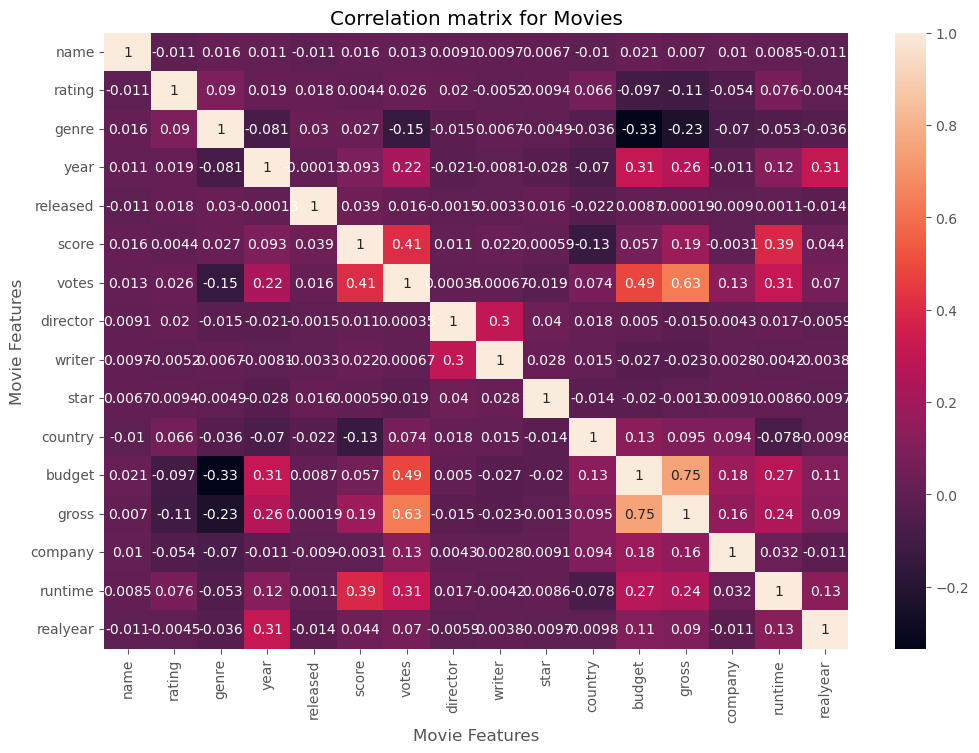

In [168]:
correlation_matrix = df_numerized.corr(method='pearson')
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation matrix for Movies')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

NameError: name 'cat_columns' is not defined

M:\Anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 96.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
M:\Anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 87.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
M:\Anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 48.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
M:\Anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 83.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
M:\Anaconda\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 88.7% of the points cannot be placed; you may want to decrease the size of the marke

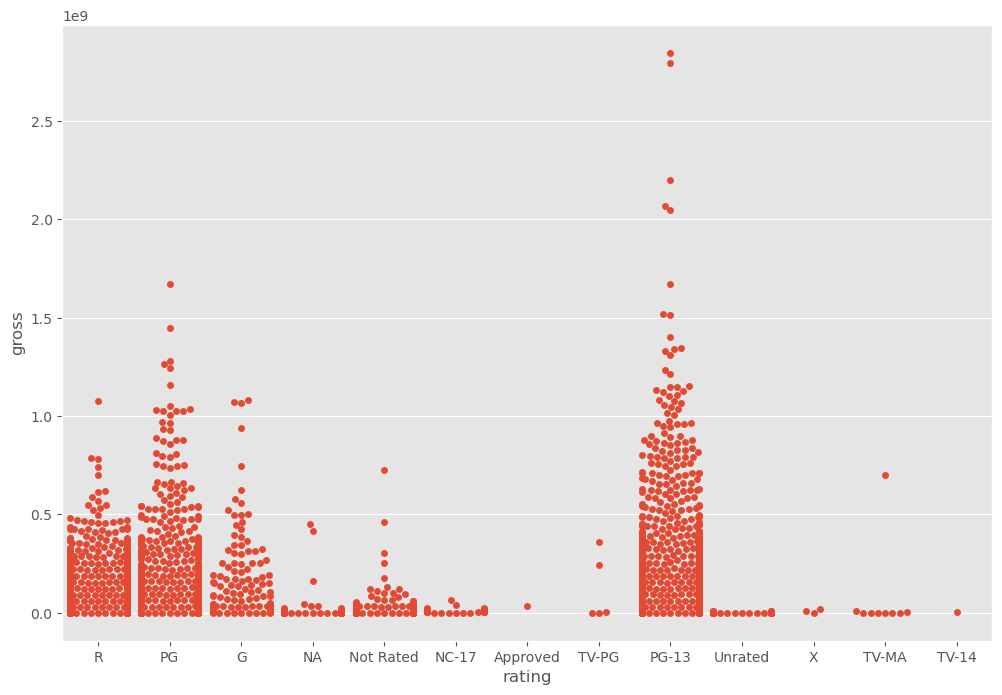

In [202]:
#Checking correlation between movie rating and gross income

sns.swarmplot(x='rating', y='gross', data=df)
plt.show()

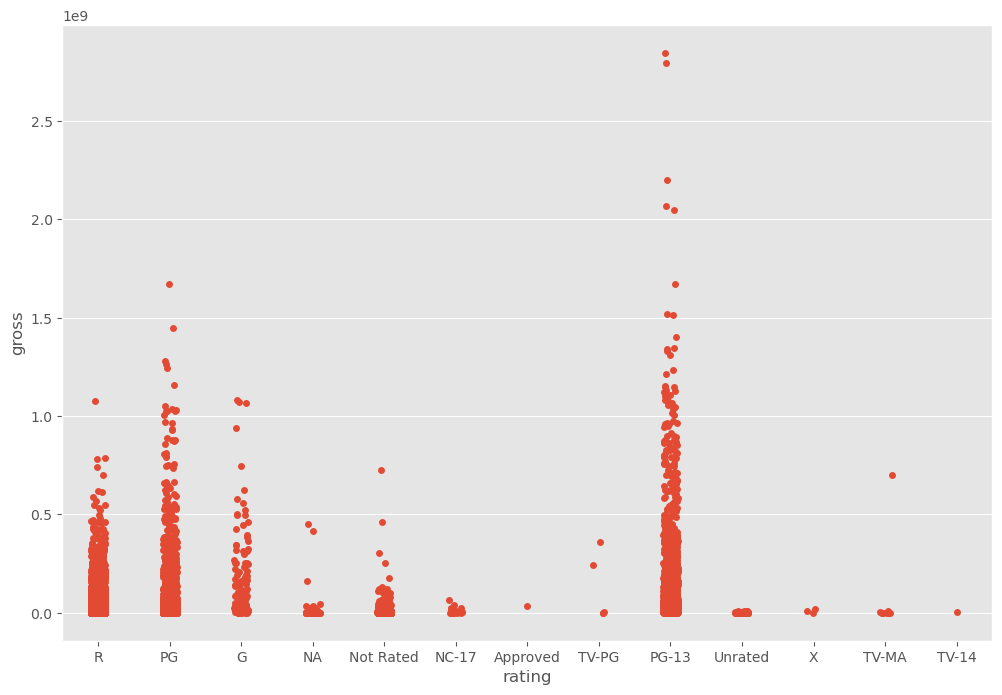

In [203]:
#Swarm plot took too long

sns.stripplot(x='rating', y='gross', data=df)
plt.show()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,realyear
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NA,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NA,90,2020
7664,Dream Round,NA,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90,2020
7665,Saving Mbango,NA,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,0,2020
7666,It's Just Us,NA,Drama,2020,"October 1, 2020 (United States)",0.0,0,James Randall,James Randall,Christina Roz,United States,15000,0,NA,120,2020
